In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

raw_df = pd.read_csv('aviasales_data_t (8).csv')
raw_df
iata_codes = ['MOW', 'LED', 'KZN', 'CEK', 'SVX', 'AER', 'KRR', 'KGD']    # Moscow, Saint Petersburg, Kazan, Chelyabinsk, Ekaterinburg, Sochi, Krasnodar, Kaliningrad
iata_codes_extra = ['SGC', 'OVB', 'VVO', 'YKS']      # Surgut, Novosibirsk, Vladivostok, Yakutsk
iata_codes_for_extra = ['MOW', 'LED', 'SVX']
df = raw_df.loc[raw_df['departure_at'] < '2021-04-01']
df.head(10)

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
0,MOW,LED,2021-03-06T18:45:00Z,DP,205,3568,2021-03-06T13:24:28Z,21-03-06T10:28:54Z
1,MOW,LED,2021-03-07T04:20:00Z,U6,9631,2438,2021-03-07T04:20:00Z,21-03-06T10:28:54Z
2,MOW,LED,2021-03-08T03:45:00Z,DP,201,2411,2021-03-08T03:45:00Z,21-03-06T10:28:54Z
3,MOW,LED,2021-03-09T05:10:00Z,DP,207,2618,2021-03-09T05:10:00Z,21-03-06T10:28:54Z
4,MOW,LED,2021-03-10T04:30:00Z,DP,209,2468,2021-03-09T06:15:06Z,21-03-06T10:28:54Z
5,MOW,LED,2021-03-11T05:10:00Z,DP,207,2449,2021-03-08T21:55:05Z,21-03-06T10:28:54Z
6,MOW,LED,2021-03-12T04:30:00Z,DP,209,2940,2021-03-09T03:35:23Z,21-03-06T10:28:54Z
7,MOW,LED,2021-03-13T13:10:00Z,DP,211,2894,2021-03-08T10:35:19Z,21-03-06T10:28:54Z
8,MOW,LED,2021-03-14T04:20:00Z,U6,9631,2238,2021-03-09T07:07:11Z,21-03-06T10:28:54Z
9,MOW,LED,2021-03-15T07:30:00Z,UT,369,2590,2021-03-09T05:14:57Z,21-03-06T10:28:54Z


In [ ]:
#на самом деле эти три цикла делают одно и то же, но полеты между крупными пересадочными узлами и средними городами вынесены по отдельности (круп-сред, сред-круп, круп-круп)
for dest in iata_codes_extra:
  for orig in iata_codes_for_extra:
    print(orig,' ',dest)
    orig_dest = df.loc[(df['destination'] == dest) & (df['origin'] == orig)]
    sorted = orig_dest.sort_values(by=['departure_at', 'airline', 'requested_at'])
    cur_price = 10000000
    depart = ''
    airline = ''
    for index, row in sorted.iterrows():
      if (int(row['price']) < cur_price - 500) and (row['departure_at'] == depart) and (row['airline'] == airline): #на маленькие ценовые изменения забиваем
        print(row['price'],' ',cur_price, cur_price-int(row['price']))
      depart = row['departure_at']
      cur_price = int(row['price'])
      airline = row['airline']
    

for orig in iata_codes_extra:
  for dest in iata_codes_for_extra:
    print(orig,' ',dest)
    orig_dest = df.loc[(df['destination'] == dest) & (df['origin'] == orig)]
    sorted = orig_dest.sort_values(by=['departure_at', 'airline', 'requested_at']) 
    cur_price = 10000000
    depart = ''
    airline = ''
    for index, row in sorted.iterrows():
      if (int(row['price']) < cur_price - 500) and (row['departure_at'] == depart) and (row['airline'] == airline): #на маленькие ценовые изменения забиваем
        print(row['price'],' ',cur_price, cur_price-int(row['price']))
      depart = row['departure_at']
      cur_price = int(row['price'])
      airline = row['airline']


for dest in iata_codes:
  for orig in iata_codes:
    print(orig,' ',dest)
    orig_dest = df.loc[(df['destination'] == dest) & (df['origin'] == orig)]
    sorted = orig_dest.sort_values(by=['departure_at', 'airline', 'requested_at'])
    cur_price = 10000000
    depart = ''
    airline = ''
    for index, row in sorted.iterrows():
      if (int(row['price']) < cur_price - 500) and (row['departure_at'] == depart) and (row['airline'] == airline): #на маленькие ценовые изменения забиваем
        print(row['price'],' ',cur_price, cur_price-int(row['price']))
      depart = row['departure_at']
      cur_price = int(row['price'])
      airline = row['airline']


MOW  - SVX


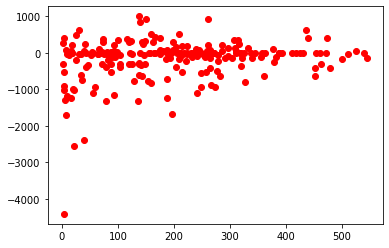

LED  - SVX


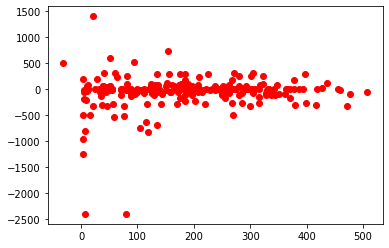

KZN  - SVX


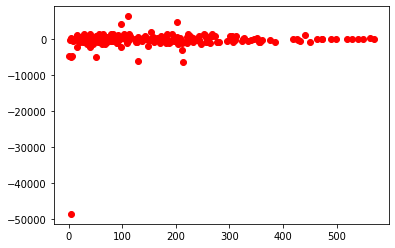

CEK  - SVX


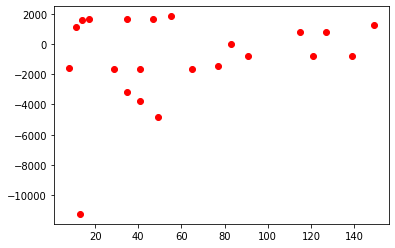

SVX  - SVX


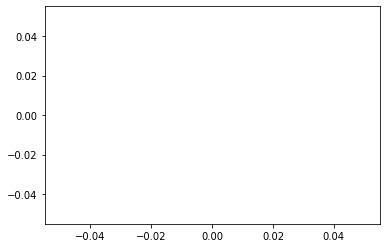

AER  - SVX


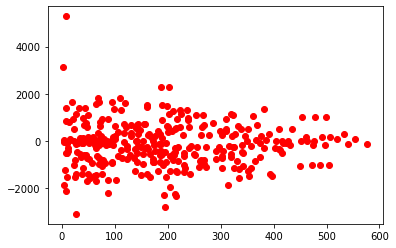

KRR  - SVX


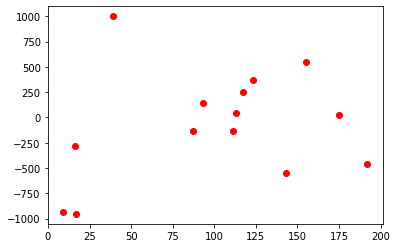

KGD  - SVX


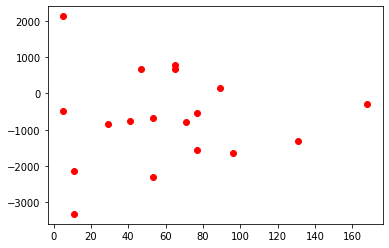

In [3]:
dest = 'SVX' #это тот же цикл, что и сверху, но для просмотра полетов из(в) конкретного аэропорта
counter = 0
for orig in iata_codes:
  changes = pd.DataFrame(columns=['origin', 'difference', 'departure_at', 'requested_at', 'until_dep'])
  orig_dest = df.loc[(df['destination'] == dest) & (df['origin'] == orig)]
  sorted = orig_dest.sort_values(by=['departure_at', 'airline', 'requested_at'])
  cur_price = 10000000
  depart = ''
  airline = ''
  for index, row in sorted.iterrows():
    if (int(row['price']) != cur_price) and (row['departure_at'] == depart) and (row['airline'] == airline) and (row['airline'] != 'DP'): #на маленькие ценовые изменения забиваем
       #print(row['price'],' ',cur_price, cur_price-int(row['price']))
       departure_at = datetime.datetime.strptime(row['departure_at'], "%Y-%m-%dT%H:%M:%SZ")
       requested_at = datetime.datetime.strptime(row['requested_at'], "%y-%m-%dT%H:%M:%SZ")
       changes.loc[counter] = [orig, cur_price-int(row['price']), departure_at, requested_at, departure_at - requested_at]
       counter += 1
    depart = row['departure_at']
    cur_price = int(row['price'])
    airline = row['airline']
  print(orig, ' - SVX')
  plt.plot(changes['until_dep'].astype('timedelta64[h]'), changes['difference'], 'ro')
  plt.show()

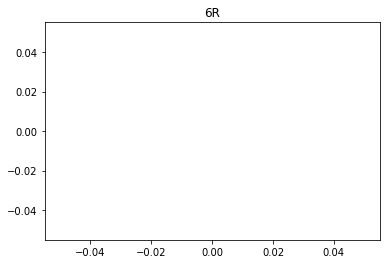

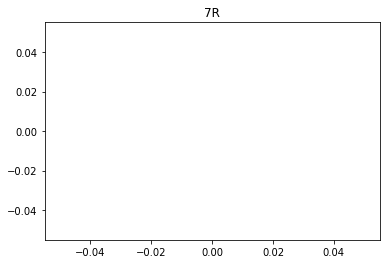

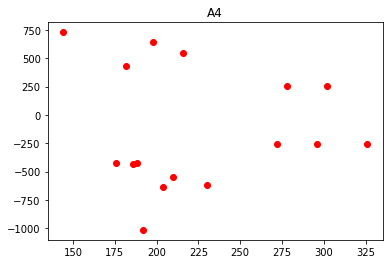

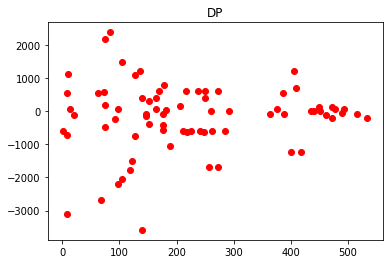

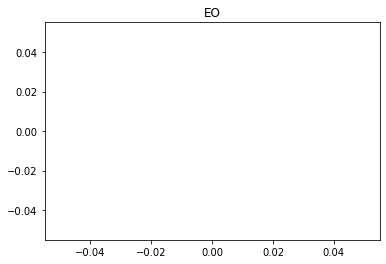

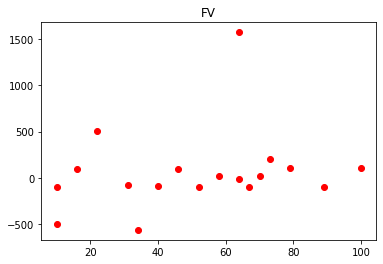

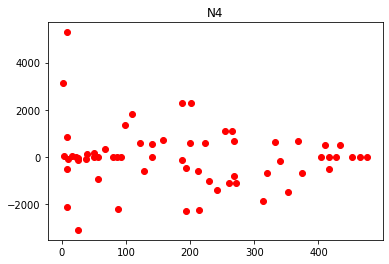

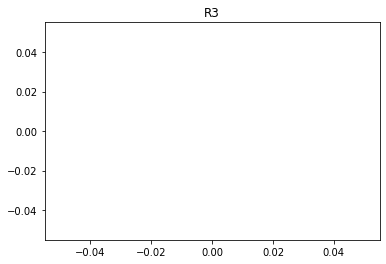

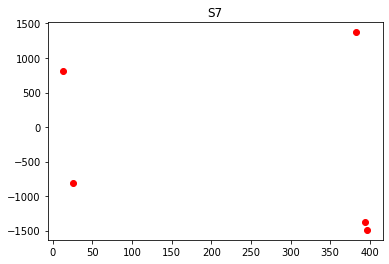

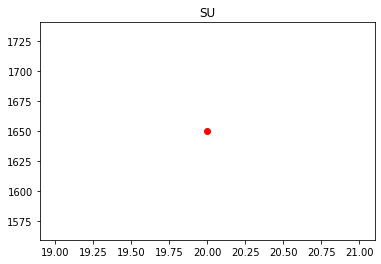

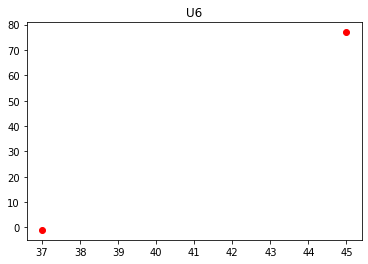

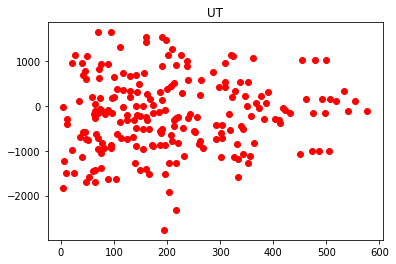

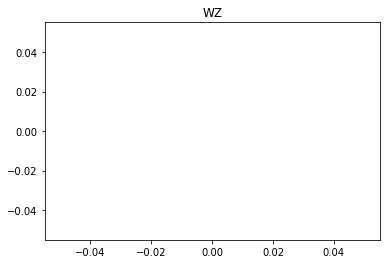

In [4]:
def show_difference_data(dest, orig):
  changes = pd.DataFrame(columns=['origin', 'destination', 'airline', 'difference',  'new_price', 'departure_at', 'requested_at', 'until_dep'])
  counter = 0
  orig_dest = df.loc[(df['destination'] == dest) & (df['origin'] == orig)]
  sorted = orig_dest.sort_values(by=['airline', 'departure_at', 'requested_at'])

  cur_price = 10000000
  depart = ''
  airline = ''
  for index, row in sorted.iterrows():
    if (airline != '') and (row['airline'] != airline):
      plt.title(airline)
      plt.plot(changes['until_dep'].astype('timedelta64[h]'), changes['difference'], 'ro')
      plt.show()
      changes = pd.DataFrame(columns=['origin', 'destination', 'airline', 'difference',  'new_price', 'departure_at', 'requested_at', 'until_dep'])
    if (int(row['price']) != cur_price) and (row['departure_at'] == depart) and (row['airline'] == airline):
      #print(row['price'],' ',cur_price, cur_price-int(row['price']))
      departure_at = datetime.datetime.strptime(row['departure_at'], "%Y-%m-%dT%H:%M:%SZ")
      requested_at = datetime.datetime.strptime(row['requested_at'], "%y-%m-%dT%H:%M:%SZ")
      changes.loc[counter] = [orig, dest, row['airline'],cur_price-int(row['price']), int(row['price']), departure_at, requested_at, departure_at - requested_at]
      counter += 1
    depart = row['departure_at']
    cur_price = int(row['price'])    
    airline = row['airline']

show_difference_data('SVX', 'AER')